In [16]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  4 14:33:21 2019

@author: Theo
"""


import numpy as np
from openpiv import windef
from openpiv.test import test_process 
from openpiv import preprocess
import pathlib
import os
import matplotlib.pyplot as plt


In [17]:

frame_a, frame_b = test_process.create_pair(image_size=256)
shift_u, shift_v, threshold = test_process.shift_u, test_process.shift_v, \
                              test_process.threshold

# this test are created only to test the displacement evaluation of the
# function the validation methods are not tested here ant therefore
# are disabled.

settings = windef.PIVSettings()
settings.windowsizes = (64,)
settings.overlap = (32,)
settings.num_iterations = 1
settings.correlation_method = 'circular'
settings.sig2noise_method = 'peak2peak'
settings.subpixel_method = 'gaussian'
settings.sig2noise_mask = 2



In [18]:

# circular cross correlation
def test_first_pass_circ():
    """ test of the first pass """
    x, y, u, v, s2n = windef.first_pass(
        frame_a,
        frame_b,
        settings
    )
    print("\n", x, y, u, v, s2n)
    assert np.mean(np.abs(u - shift_u)) < threshold
    assert np.mean(np.abs(v - shift_v)) < threshold



In [19]:
test_first_pass_circ()


 [[ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]] [[ 32.  32.  32.  32.  32.  32.  32.]
 [ 64.  64.  64.  64.  64.  64.  64.]
 [ 96.  96.  96.  96.  96.  96.  96.]
 [128. 128. 128. 128. 128. 128. 128.]
 [160. 160. 160. 160. 160. 160. 160.]
 [192. 192. 192. 192. 192. 192. 192.]
 [224. 224. 224. 224. 224. 224. 224.]] [[-3.48853232 -3.49172956 -3.48838473 -3.49183355 -3.49742935 -3.47646367
  -3.50077889]
 [-3.50543698 -3.49384565 -3.49203047 -3.49415425 -3.49289956 -3.48115936
  -3.51185417]
 [-3.49539542 -3.48705721 -3.48767375 -3.49356523 -3.48727225 -3.48108877
  -3.49590096]
 [-3.48158163 -3.4733631  -3.47934388 -3.48862114 -3.48914016 -3.48186781
  -3.48315708]
 [-3.48969991 -3.48666121 -3.4973138  -3.48678537 -3.49014378 -3.48997316
  -3.49397751]
 [-3.48097908 -3.49

In [20]:

def test_multi_pass_circ():
    """ test fot the multipass """
    settings.windowsizes = (64, 64, 16)
    settings.overlap = (32, 32, 8)
    settings.num_iterations = 2
    settings.interpolation_order = 3
    # ettings.show_all_plots = True

    x, y, u, v, s2n = windef.first_pass(
        frame_a,
        frame_b,
        settings,
    )
    print("first pass\n")
    print("\n", x, y, u, v, s2n)
    assert np.allclose(u, shift_u, atol = threshold)
    assert np.allclose(v, shift_v, atol = threshold)

    u = np.ma.masked_array(u, mask=np.ma.nomask)
    v = np.ma.masked_array(v, mask=np.ma.nomask)

    for i in range(1,settings.num_iterations):
        x, y, u, v, s2n, _ = windef.multipass_img_deform(
            frame_a,
            frame_b,
            i,
            x,
            y,
            u,
            v,
            settings
        )

    print(f"Pass {i}\n")
    print(x)
    print(y)
    print(u) 
    print(v)
    print(s2n)
    assert np.mean(np.abs(u - shift_u)) < threshold
    assert np.mean(np.abs(v - shift_v)) < threshold
    # the second condition is to check if the multipass is done.
    # It need's a little numerical inaccuracy.


In [21]:
test_multi_pass_circ()

first pass


 [[ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]] [[ 32.  32.  32.  32.  32.  32.  32.]
 [ 64.  64.  64.  64.  64.  64.  64.]
 [ 96.  96.  96.  96.  96.  96.  96.]
 [128. 128. 128. 128. 128. 128. 128.]
 [160. 160. 160. 160. 160. 160. 160.]
 [192. 192. 192. 192. 192. 192. 192.]
 [224. 224. 224. 224. 224. 224. 224.]] [[-3.48853232 -3.49172956 -3.48838473 -3.49183355 -3.49742935 -3.47646367
  -3.50077889]
 [-3.50543698 -3.49384565 -3.49203047 -3.49415425 -3.49289956 -3.48115936
  -3.51185417]
 [-3.49539542 -3.48705721 -3.48767375 -3.49356523 -3.48727225 -3.48108877
  -3.49590096]
 [-3.48158163 -3.4733631  -3.47934388 -3.48862114 -3.48914016 -3.48186781
  -3.48315708]
 [-3.48969991 -3.48666121 -3.4973138  -3.48678537 -3.49014378 -3.48997316
  -3.49397751]
 [-3.48

In [22]:


# linear cross correlation
def test_first_pass_lin():
    """ test of the first pass """
    settings.correlation_method = 'linear'

    x, y, u, v, s2n = windef.first_pass(
        frame_a,
        frame_b,
        settings,
    )
    print("\n", x, y, u, v, s2n)
    assert np.mean(np.abs(u - shift_u)) < threshold
    assert np.mean(np.abs(v - shift_v)) < threshold



In [23]:
test_first_pass_lin()


 [[ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]] [[ 32.  32.  32.  32.  32.  32.  32.]
 [ 64.  64.  64.  64.  64.  64.  64.]
 [ 96.  96.  96.  96.  96.  96.  96.]
 [128. 128. 128. 128. 128. 128. 128.]
 [160. 160. 160. 160. 160. 160. 160.]
 [192. 192. 192. 192. 192. 192. 192.]
 [224. 224. 224. 224. 224. 224. 224.]] [[-3.4874333  -3.48452903 -3.47870176 -3.48798008 -3.48996055 -3.47483023
  -3.49255314]
 [-3.49266817 -3.48957753 -3.48334849 -3.49154857 -3.47795129 -3.47394717
  -3.50282379]
 [-3.48573237 -3.48200457 -3.48070694 -3.48061541 -3.47390209 -3.47678846
  -3.48565032]
 [-3.48315734 -3.46993561 -3.47402663 -3.47785741 -3.47211044 -3.4772208
  -3.47781476]
 [-3.47602967 -3.47837697 -3.49059034 -3.48745475 -3.47565969 -3.48445661
  -3.48300368]
 [-3.47591488 -3.489

In [24]:
from importlib_resources import files
from pathlib import Path

def test_invert_and_piv():
    """ Test windef.piv with invert option """

    settings = windef.PIVSettings()
    'Data related settings'
    # Folder with the images to process
    settings.filepath_images = Path(files('openpiv')) / "data" / "test1"
    settings.save_path = settings.filepath_images.parent
    # Root name of the output Folder for Result Files
    settings.save_folder_suffix = 'test_invert'
    # Format and Image Sequence
    settings.frame_pattern_a = 'exp1_001_a.bmp'
    settings.frame_pattern_b = 'exp1_001_b.bmp'

    settings.num_iterations = 1
    settings.show_plot = False
    settings.scale_plot = 100
    settings.show_all_plots = True
    settings.invert = True

    windef.piv(settings)



/home/user/Documents/repos/openpiv-python/openpiv/data/test1
exp1_001_a.bmp
True
[PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test1/exp1_001_a.bmp')]


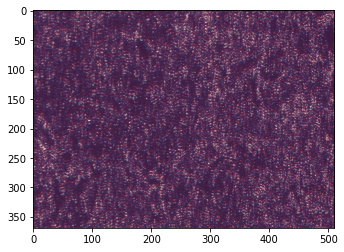

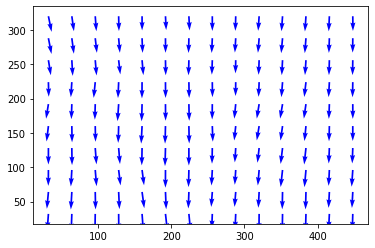

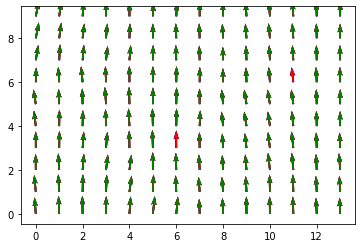

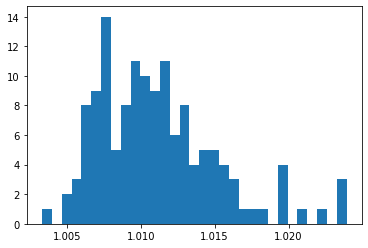

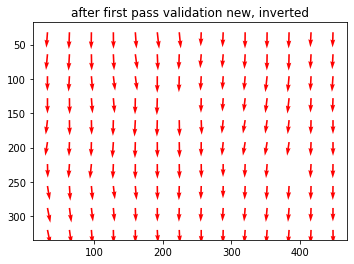

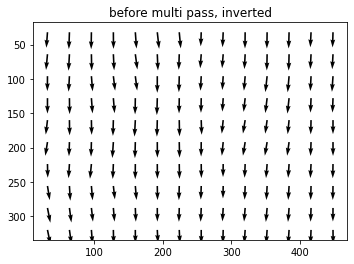

Image Pair 1
exp1_001_a exp1_001_b


In [25]:
test_invert_and_piv()

In [26]:

def test_multi_pass_lin():
    """ test fot the multipass """
    settings.windowsizes = (64, 32, 16)
    settings.overlap = (32, 16, 8)
    settings.num_iterations = 1
    settings.sig2noise_validate = True
    settings.correlation_method = 'linear'
    settings.normalized_correlation = True
    settings.sig2noise_method = 'peak2peak'
    settings.sig2noise_threshold = 1.0
    

    x, y, u, v, s2n = windef.first_pass(
        frame_a,
        frame_b,
        settings,
    )

    print("\n", x, y, u, v, s2n)
    assert np.mean(np.abs(u - shift_u)) < threshold
    assert np.mean(np.abs(v - shift_v)) < threshold


    mask_coords = []
    u = np.ma.masked_array(u, mask=np.ma.nomask)
    v = np.ma.masked_array(v, mask=np.ma.nomask)

    for i in range(1, settings.num_iterations):
        x, y, u, v, s2n, _ = windef.multipass_img_deform(
            frame_a,
            frame_b,
            i,
            x,
            y,
            u,
            v,
            settings,
        )
        print(f"Iteration {i}")
        print("\n", x, y, u, v, s2n)
        assert np.allclose(u, shift_u, atol=threshold)
        assert np.allclose(v, shift_v, atol=threshold)

    # the second condition is to check if the multipass is done.
    # It need's a little numerical inaccuracy.


In [27]:
test_multi_pass_lin()


 [[ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]] [[ 32.  32.  32.  32.  32.  32.  32.]
 [ 64.  64.  64.  64.  64.  64.  64.]
 [ 96.  96.  96.  96.  96.  96.  96.]
 [128. 128. 128. 128. 128. 128. 128.]
 [160. 160. 160. 160. 160. 160. 160.]
 [192. 192. 192. 192. 192. 192. 192.]
 [224. 224. 224. 224. 224. 224. 224.]] [[-3.50369112 -3.49711136 -3.48140639 -3.48992762 -3.48999298 -3.47977266
  -3.50521113]
 [-3.5037635  -3.50124862 -3.4895115  -3.49899346 -3.48338022 -3.48027408
  -3.51016152]
 [-3.50008667 -3.49901987 -3.48730436 -3.48713212 -3.47359573 -3.48156511
  -3.49075837]
 [-3.49325286 -3.48233213 -3.47807257 -3.48459519 -3.47060743 -3.48235851
  -3.47888616]
 [-3.47451083 -3.47886602 -3.49290744 -3.49102889 -3.47642039 -3.49024405
  -3.49187324]
 [-3.47730625 -3.49

In [28]:
from openpiv.pyprocess import extended_search_area_piv, get_field_shape, get_coordinates

u, v, s2n = extended_search_area_piv(
    frame_a,
    frame_b,
    window_size=settings.windowsizes[0],
    overlap=settings.overlap[0],
    search_area_size=settings.windowsizes[0],
    width=settings.sig2noise_mask,
    subpixel_method=settings.subpixel_method,
    sig2noise_method=settings.sig2noise_method,
    correlation_method=settings.correlation_method,
    normalized_correlation=settings.normalized_correlation
)

shapes = np.array(get_field_shape(frame_a.shape,
                                  settings.windowsizes[0],
                                  settings.overlap[0]))
u = u.reshape(shapes)
v = v.reshape(shapes)
s2n = s2n.reshape(shapes)

x, y = get_coordinates(frame_a.shape,
                       settings.windowsizes[0],
                       settings.overlap[0])

# return x, y, u, v, s2n

In [29]:
def test_static_masking():
    """ Test windef.piv with invert option """
    from importlib_resources import files
    

    settings = windef.PIVSettings()
    'Data related settings'
    # Folder with the images to process
    settings.filepath_images = files('openpiv') / "data" / "test2"
    settings.save_path = pathlib.Path('.')
    # Root name of the output Folder for Result Files
    settings.save_folder_suffix = 'test'
    # Format and Image Sequence
    settings.frame_pattern_a = '2image_*.tif'
    settings.frame_pattern_b = '(1+2),(3+4)'

    from openpiv.tools import imread
    images = sorted(settings.filepath_images.glob(settings.frame_pattern_a))
    frame_a = imread(images[0])
    settings.static_mask = np.where(frame_a > 150, True, False)
    # print(settings.static_mask)
    plt.imshow(settings.static_mask)

    settings.num_iterations = 1
    settings.show_plot = True
    settings.scale_plot = 50
    settings.show_all_plots = False
    settings.invert = False

    windef.piv(settings)

/home/user/Documents/repos/openpiv-python/openpiv/data/test2
2image_*.tif
True
[PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_00.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_01.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_10.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_11.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_20.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_21.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_30.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_31.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_40.tif'), PosixPath('/home/user/Documents/repos/openpiv-python/openpiv/data/test2/2image_41.tif'), PosixPath('/home/user/Document

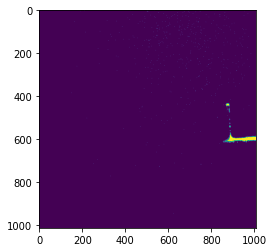

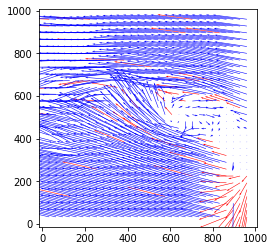

Image Pair 1
2image_00 2image_01
Inside display_vector_field
OpenPIV_results_64_test/field_A0001.txt


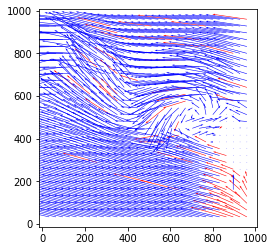

Image Pair 2
2image_10 2image_11
Inside display_vector_field
OpenPIV_results_64_test/field_A0002.txt


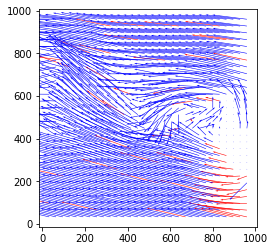

Image Pair 3
2image_20 2image_21
Inside display_vector_field
OpenPIV_results_64_test/field_A0003.txt


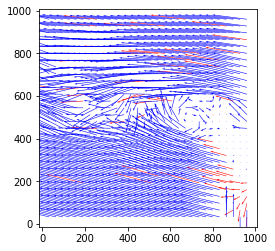

Image Pair 4
2image_30 2image_31
Inside display_vector_field
OpenPIV_results_64_test/field_A0004.txt


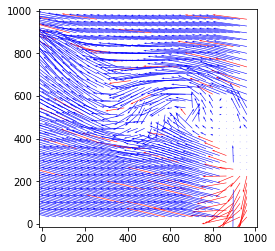

Image Pair 5
2image_40 2image_41
Inside display_vector_field
OpenPIV_results_64_test/field_A0005.txt


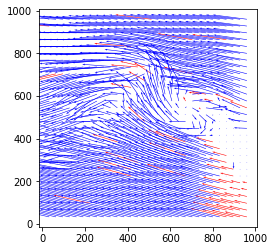

Image Pair 6
2image_50 2image_51


In [30]:
test_static_masking()